<a href="https://colab.research.google.com/github/MehwishSayyed/f1_visualization_-_prediction/blob/main/F1_Visualization_and__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VISUALIZATION OF F1


In [3]:
!pip install fastf1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.17.0 requires websockets<16.0.0,>=15.0.1, but you have websockets 13.1 which is incompatible.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.


In [4]:

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as ff1


Set **parametrs**

In [15]:
year = 2023
wknd = 21
ses = 'R'
driver ='HAM'
colormap = mpl.cm.plasma

In [16]:
session = ff1.get_session(year,wknd,ses)
session.load()
weekend = session.event


core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for Las Vegas Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:54:30.642' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:52:35.501' in

pick fatest lap for the driver

In [24]:
lap = session.laps.pick_drivers(driver).pick_fastest()
tel = lap.get_telemetry()
x = tel['Distance']
y= tel['Speed']
speed = tel['Speed']

**create** ***line*** ***segments*** for **coloring**

*Create* line segments so we can color the track by speed. Now, the track will visually show where Hamilton accelerates, brakes, and hits top speed.



In [25]:
points = np.array([x, y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


**PLOT** **IT**

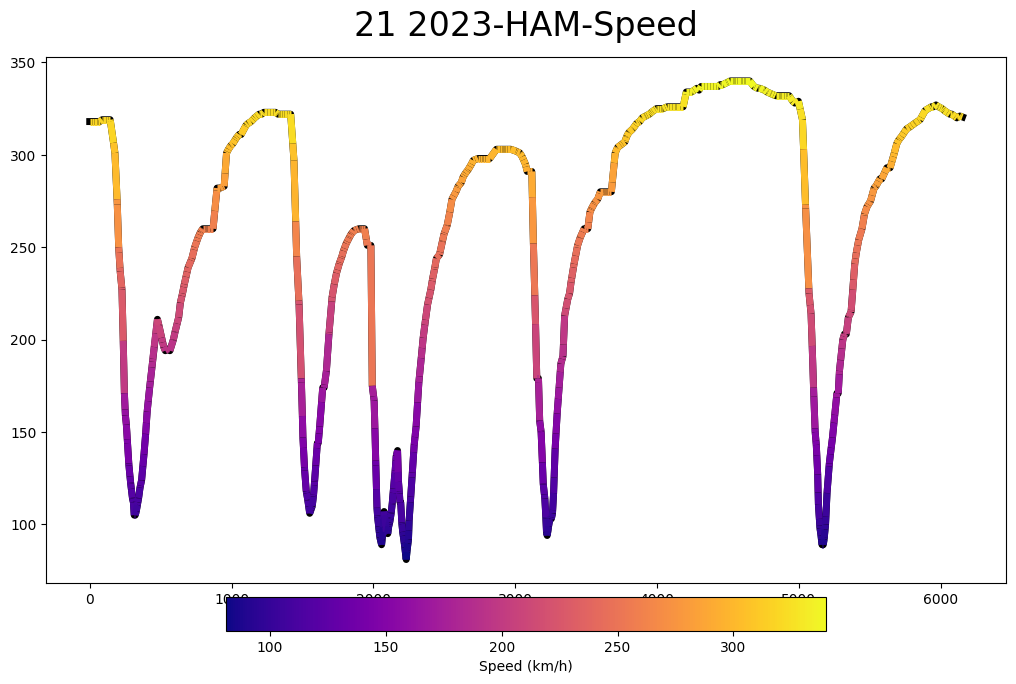

In [27]:
fig, ax = plt.subplots(figsize=(12,6.75))
fig.suptitle(f'{weekend.name} {year}-{driver}-Speed', size=24, y=0.97)
#suptitl name of the graph y=0.97 slightly adjusts the vertical position (moves the title a bit lower from the top).

#Plot background track line
ax.plot(x, y, color='black', linestyle='-', linewidth=5, zorder=0)
# zorder=0 puts it behind colored lines, so the colored line sits on top

#Create line collection for colored track
norm = plt.Normalize(speed.min(), speed.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)
lc.set_array(speed)
ax.add_collection(lc)

#color bar
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=speed.min(), vmax=speed.max())
mpl.colorbar.ColorbarBase(cbaxes, cmap=colormap, norm=normlegend, orientation='horizontal', label="Speed (km/h)")

#Adjust plot
#ax.axis('off')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
plt.show()


In [30]:
import pandas as pd

df = pd.DataFrame(tel)

print(f"✅ before cleaning dataset shape: {df.shape}")
print(df.isnull().sum())

# Remove invalid or negative speed values

if 'Speed' in df.columns:
    df = df[df['Speed'] >= 0]

#Reset invalid or _ve speed val

df.reset_index(drop=True, inplace=True)

print("\nAfter cleaning:")
print(f"✅ Cleaned dataset shape: {df.shape}")

✅ before cleaning dataset shape: (734, 18)
Date                     0
SessionTime              0
DriverAhead              0
DistanceToDriverAhead    0
Time                     0
RPM                      0
Speed                    0
nGear                    0
Throttle                 0
Brake                    0
DRS                      0
Source                   0
Distance                 0
RelativeDistance         0
Status                   0
X                        0
Y                        0
Z                        0
dtype: int64

After cleaning:
✅ Cleaned dataset shape: (734, 18)
